In [2]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
import sys
import os

sys.path.append(os.path.abspath("../scripts"))

from preProcessing import preprocess_text_column

df_clean = pd.read_csv('../data/fintech_reviews_cleaned.csv')

df_cleaned = preprocess_text_column(df_clean, column="review_text")

from sentiment_analysis import  apply_sentiment_analysis

df = apply_sentiment_analysis(df_cleaned, text_column="review_text")

df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tsega\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tsega\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\tsega\Desktop\week2-Customer-Experience-Analytics-for-Fintech-Apps\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


,review_text,rating,date,app_name,source,bert_label,bert_score,vader_score,vader_label,textblob_score,textblob_label
0,the app is proactive and a good connections,5,2025-06-05 15:55:10,Commercial Bank of Ethiopia,Google Play,positive,0.999867,0.6908,positive,0.700000,positive
1,i cannot send to cbebirr app through this app,3,2025-06-05 11:12:49,Commercial Bank of Ethiopia,Google Play,negative,0.992965,0.0000,neutral,0.000000,neutral
2,good,4,2025-06-05 10:21:59,Commercial Bank of Ethiopia,Google Play,positive,0.999816,0.4404,positive,0.700000,positive
3,not functional,1,2025-06-05 07:38:12,Commercial Bank of Ethiopia,Google Play,negative,0.999779,0.0000,neutral,0.000000,neutral
4,everytime you uninstall the app you have to re...,1,2025-06-04 21:33:36,Commercial Bank of Ethiopia,Google Play,negative,0.995119,0.0258,neutral,0.196667,positive


In [3]:
# Check if all three models agree on sentiment
df["all_agree"] = (df["bert_label"] == df["vader_label"]) & (df["vader_label"] == df["textblob_label"])

# Check pairwise agreement
df["bert_vader_agree"] = df["bert_label"] == df["vader_label"]
df["bert_textblob_agree"] = df["bert_label"] == df["textblob_label"]
df["vader_textblob_agree"] = df["vader_label"] == df["textblob_label"]

# Summary statistics
agreement_summary = {
    "Total Reviews": len(df),
    "All Agree": df["all_agree"].sum(),
    "BERT & VADER Agree": df["bert_vader_agree"].sum(),
    "BERT & TextBlob Agree": df["bert_textblob_agree"].sum(),
    "VADER & TextBlob Agree": df["vader_textblob_agree"].sum(),
}

# Display summary
for key, value in agreement_summary.items():
    print(f"{key}: {value} ({value / len(df) * 100:.1f}%)")


Total Reviews: 1200 (100.0%)
All Agree: 664 (55.3%)
BERT & VADER Agree: 785 (65.4%)
BERT & TextBlob Agree: 708 (59.0%)
VADER & TextBlob Agree: 978 (81.5%)


In [4]:
import sys
import os
import importlib

# Add the directory containing the module to the path
sys.path.append(os.path.abspath("../scripts"))

# Import the whole module (not just the function)
import sentiment_analysis

# Reload the module after making code changes to it
importlib.reload(sentiment_analysis)

# Then call the function
result = sentiment_analysis.aggregate_sentiment_by_bank_and_rating(df)
print(result)


                       app_name  rating  bert_score  vader_score  \
0             Bank of Abyssinia       1    0.981555    -0.148979   
1             Bank of Abyssinia       2    0.965072     0.132891   
2             Bank of Abyssinia       3    0.952245     0.190100   
3             Bank of Abyssinia       4    0.944059     0.333017   
4             Bank of Abyssinia       5    0.966845     0.341775   
5   Commercial Bank of Ethiopia       1    0.960253     0.004104   
6   Commercial Bank of Ethiopia       2    0.983425     0.080067   
7   Commercial Bank of Ethiopia       3    0.973157     0.163362   
8   Commercial Bank of Ethiopia       4    0.934153     0.272611   
9   Commercial Bank of Ethiopia       5    0.980264     0.408959   
10                  Dashen Bank       1    0.994376    -0.019136   
11                  Dashen Bank       2    0.965558    -0.095700   
12                  Dashen Bank       3    0.984606     0.303873   
13                  Dashen Bank       4    0.978

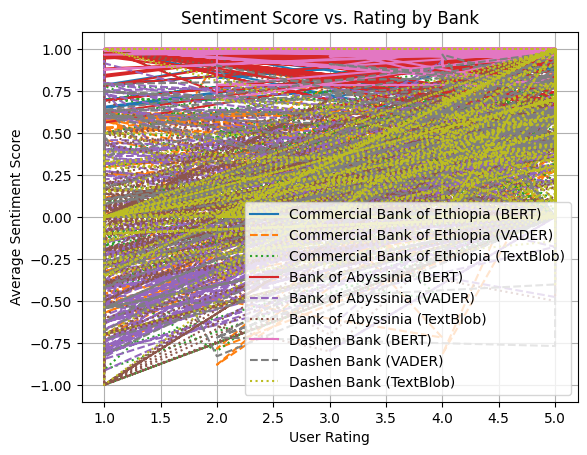

In [5]:
import matplotlib.pyplot as plt

banks = df['app_name'].unique()

for bank in banks:
    subset = df[df['app_name'] == bank]
    plt.plot(subset['rating'], subset['bert_score'], label=f'{bank} (BERT)')
    plt.plot(subset['rating'], subset['vader_score'], '--', label=f'{bank} (VADER)')
    plt.plot(subset['rating'], subset['textblob_score'], ':', label=f'{bank} (TextBlob)')

plt.xlabel("User Rating")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Score vs. Rating by Bank")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [6]:
import sys
import os
import importlib

# Add the directory containing the module to the path
sys.path.append(os.path.abspath("../scripts"))

# Import the whole module (not just the function)
import thematic_analysis

# Reload the module after making code changes to it
importlib.reload(thematic_analysis)

from thematic_analysis import extract_keywords

# Apply to your DataFrame
results = extract_keywords(df)
results.head()




['able' 'able access' 'able transfer' 'absolutely' 'abyssinia'
 'abyssinia bank' 'acc' 'accept' 'access' 'access account'
 'access developer' 'accessible' 'account' 'account statement'
 'account thank' 'activate' 'activation' 'active' 'activity' 'actually'
 'actually work' 'add' 'add option' 'add security' 'address'
 'address soon' 'advancement' 'ago' 'ahead' 'airtime' 'allinone'
 'allinone solution' 'allow' 'allow screenshot' 'alot' 'alternative'
 'amazing' 'amazing app' 'amazing application' 'amazing mobile'
 'amazing user' 'amole' 'amole app' 'android' 'android phone'
 'android version' 'annoying' 'anytime' 'aplication' 'apollo']


,review_text,cleaned_text,top_keywords,app_name,rating
0,the app is proactive and a good connections,app proactive good connection,"[good connection, connection, good, app, ይለያል]",Commercial Bank of Ethiopia,5
1,i cannot send to cbebirr app through this app,send cbebirr app app,"[cbebirr, app app, send, app, ግን]",Commercial Bank of Ethiopia,3
2,good,good,"[good, ጥሩ, ግን ብር, ግን, ይለያል]",Commercial Bank of Ethiopia,4
3,not functional,functional,"[functional, ጥሩ, ግን ብር, ግን, ይለያል]",Commercial Bank of Ethiopia,1
4,everytime you uninstall the app you have to re...,everytime uninstall app reach physically oldy ...,"[app, physical, play, physically, reach]",Commercial Bank of Ethiopia,1


In [7]:

import sys
import os
import importlib

# Add the directory containing the module to the path
sys.path.append(os.path.abspath("../scripts"))

# Import the whole module (not just the function)
import thematic_analysis

# Reload the module after making code changes to it
importlib.reload(thematic_analysis)

from thematic_analysis import group_keywords_by_similarity
df_themed = group_keywords_by_similarity(results)
print(df_themed)

c:\Users\tsega\Desktop\week2-Customer-Experience-Analytics-for-Fintech-Apps\scripts\thematic_analysis.py:46: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  sim = kw_doc.similarity(theme_doc)


                                            review_text  \
0           the app is proactive and a good connections   
1         i cannot send to cbebirr app through this app   
2                                                  good   
3                                        not functional   
4     everytime you uninstall the app you have to re...   
...                                                 ...   
1195  it has a good performance but need more upgrad...   
1196  it is a very wonderful work that has saved its...   
1197  lifechanging i cant imagine going back to trad...   
1198                                            pro max   
1199                         the most good app and easy   

                                           top_keywords  \
0        [good connection, connection, good, app, ይለያል]   
1                     [cbebirr, app app, send, app, ግን]   
2                           [good, ጥሩ, ግን ብር, ግን, ይለያል]   
3                     [functional, ጥሩ, ግን ብር, ግን, ይለያል]

In [8]:
df_full = df.merge(df_themed, on="review_text", how="left")
df_full.head()

,review_text,rating,date,app_name,source,bert_label,bert_score,vader_score,vader_label,textblob_score,textblob_label,all_agree,bert_vader_agree,bert_textblob_agree,vader_textblob_agree,cleaned_text,top_keywords_x,top_keywords_y,themes
0,the app is proactive and a good connections,5,2025-06-05 15:55:10,Commercial Bank of Ethiopia,Google Play,positive,0.999867,0.6908,positive,0.7,positive,True,True,True,True,app proactive good connection,"[good connection, connection, good, app, ይለያል]","[good connection, connection, good, app, ይለያል]","[Transaction Performance, Customer Support & S..."
1,i cannot send to cbebirr app through this app,3,2025-06-05 11:12:49,Commercial Bank of Ethiopia,Google Play,negative,0.992965,0.0000,neutral,0.0,neutral,False,False,False,True,send cbebirr app app,"[cbebirr, app app, send, app, ግን]","[cbebirr, app app, send, app, ግን]","[User Interface & Experience, Customer Support..."
2,good,4,2025-06-05 10:21:59,Commercial Bank of Ethiopia,Google Play,positive,0.999816,0.4404,positive,0.7,positive,True,True,True,True,good,"[good, ጥሩ, ግን ብር, ግን, ይለያል]","[good, ጥሩ, ግን ብር, ግን, ይለያል]","[User Interface & Experience, Customer Support..."
3,good,4,2025-06-05 10:21:59,Commercial Bank of Ethiopia,Google Play,positive,0.999816,0.4404,positive,0.7,positive,True,True,True,True,good,"[good, ጥሩ, ግን ብር, ግን, ይለያል]","[good, ጥሩ, ግን ብር, ግን, ይለያል]","[User Interface & Experience, Customer Support..."
4,good,4,2025-06-05 10:21:59,Commercial Bank of Ethiopia,Google Play,positive,0.999816,0.4404,positive,0.7,positive,True,True,True,True,good,"[good, ጥሩ, ግን ብር, ግን, ይለያል]","[good, ጥሩ, ግን ብር, ግን, ይለያል]","[User Interface & Experience, Customer Support..."


In [10]:
df.to_csv("../data/final_reviews_with_themes.csv", index=False)

In [12]:
df_exploded = df_full.explode("themes")

# Count theme frequency per bank
theme_counts = df_exploded.groupby(["app_name", "themes"]).size().reset_index(name="count")

df_exploded.to_csv('../data/final_themed_data.csv')

# Preview
print(theme_counts)

                       app_name                               themes  count
0             Bank of Abyssinia                Account Access Issues    265
1             Bank of Abyssinia      Customer Support & Satisfaction   3295
2             Bank of Abyssinia  Feature Requests & App Enhancements      3
3             Bank of Abyssinia              Transaction Performance    327
4             Bank of Abyssinia          User Interface & Experience   3553
5   Commercial Bank of Ethiopia                Account Access Issues    231
6   Commercial Bank of Ethiopia      Customer Support & Satisfaction   3759
7   Commercial Bank of Ethiopia  Feature Requests & App Enhancements      5
8   Commercial Bank of Ethiopia              Transaction Performance    328
9   Commercial Bank of Ethiopia          User Interface & Experience   4220
10                  Dashen Bank                Account Access Issues    224
11                  Dashen Bank      Customer Support & Satisfaction   2040
12          

TypeError: unsupported operand type(s) for /: 'module' and 'str'